#### BBL514E Pattern Recognition and Analysis

#### Final Exam - 24/06/2022 - Melih Senturk - 702201006

https://github.com/mlhsntrk/BBL514E_Pattern_Recognition_And_Analysis/blob/main/final_exam.ipynb

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
c1_dataframe = pd.read_csv("C1__pts.csv")
c1_dataframe.head(5)

,x1,x2
0,0.5377,0.8404
1,1.8339,-0.8880
2,-2.2588,0.1001
3,0.8622,-0.5445
4,0.3188,0.3035


In [3]:
c2_dataframe = pd.read_csv("C2__pts.csv")
c2_dataframe.head(5)

,x1,x2
0,2.4759,3.9085
1,3.4122,2.1222
2,2.0226,3.0470
3,1.9521,1.7731
4,3.7013,1.8375


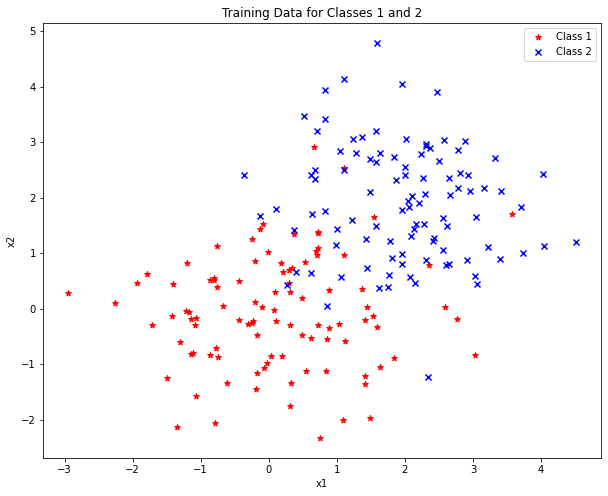

In [4]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(c1_dataframe['x1'], c1_dataframe['x2'], c='r', marker='*', label='Class 1')
plt.scatter(c2_dataframe['x1'], c2_dataframe['x2'], c='b', marker='x', label='Class 2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Training Data for Classes 1 and 2')
plt.legend()
plt.show()

In [5]:
c1_dataframe['y'] = 0
c2_dataframe['y'] = 1

In [6]:
frames = [c1_dataframe, c2_dataframe]
concat_dataframe = pd.concat(frames)
concat_dataset = concat_dataframe.values

In [7]:
def predict(row, weights):
	activation = weights[0]
	for i in range(len(row)-1):
		activation += weights[i + 1] * row[i]
	return 1.0 if activation >= 0.0 else 0.0

In [8]:
def perceptron(X, learning_rate, I):
	theta = [0.0 for i in range(len(X[0]))]
	for I in range(I):
		sum_error = 0.0
		for row in X:
			prediction = predict(row, theta)
			error = row[-1] - prediction
			sum_error += error**2
			theta[0] = theta[0] + learning_rate * error
			for i in range(len(row)-1):
				theta[i + 1] = theta[i + 1] + learning_rate * error * row[i]
	return theta, sum_error

In [27]:
def decision_boundary(X, theta):
    x1 = [X[:,0].min(), X[:,0].max()]
    m = -theta[1]/theta[2]
    c = -theta[0]/theta[2]
    x2 = np.dot(x1,m)
    x2 = [j + c for j in x2]

    fig = plt.figure(figsize=(10,8))
    plt.scatter(c1_dataframe['x1'], c1_dataframe['x2'], c='r', marker='*', label='Class 1')
    plt.scatter(c2_dataframe['x1'], c2_dataframe['x2'], c='b', marker='x', label='Class 2') 
    plt.title("Perceptron Algorithm Decision Boundary")
    plt.legend()
    plt.plot(x1, x2, 'y-')

In [28]:
weights, sum_error = perceptron(concat_dataset, 0.1, 50)
print('Weights = ', weights)
print('Number of Mismatch = ', sum_error)

Weights =  [-0.30000000000000004, 0.6164000000000016, 0.33406000000000025]
Number of Mismatch =  6.0


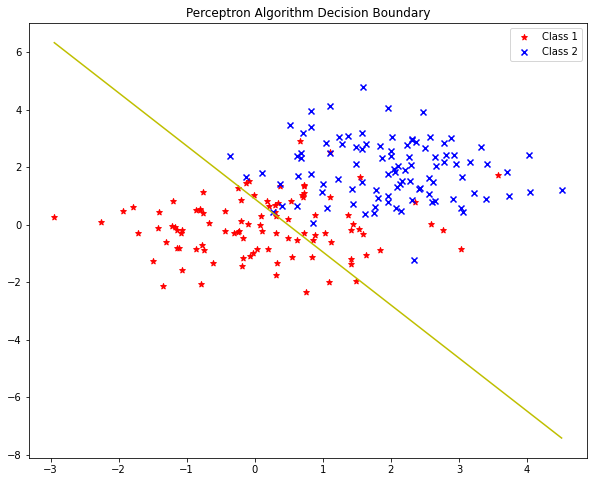

In [29]:
decision_boundary(concat_dataset, weights)

In [30]:
weights, sum_error = perceptron(concat_dataset, 0.1, 100)
print('Weights = ', weights)
print('Number of Mismatch = ', sum_error)

Weights =  [-0.30000000000000004, 0.4794300000000034, 0.5037100000000007]
Number of Mismatch =  8.0


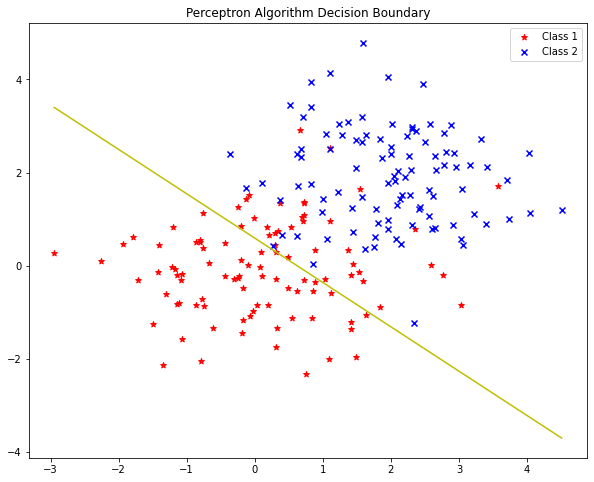

In [31]:
decision_boundary(concat_dataset, weights)

In [63]:
mu=0.0
std = 0.70710678118
def gaussian_noise(X, mu, std):
    noise = np.random.normal(mu, std, size = X[:,0:2].shape)
    noise = np.concatenate([noise, np.zeros((200,1))], axis = 1)
    X_noisy = X + noise
    return X_noisy 

In [65]:
noisy_concat_dataset = gaussian_noise(concat_dataset, mu, std)

In [71]:
noisy_X = pd.DataFrame(data = {'x1': noisy_concat_dataset[:,0], 'x2': noisy_concat_dataset[:,1]})
y = pd.DataFrame(data = {'y': noisy_concat_dataset[:,2]})

In [72]:
def initialize_centroids(k, data):

    n_dims = data.shape[1]
    centroid_min = data.min().min()
    centroid_max = data.max().max()
    centroids = []

    for centroid in range(k):
        centroid = np.random.uniform(centroid_min, centroid_max, n_dims)
        centroids.append(centroid)

    centroids = pd.DataFrame(centroids, columns = data.columns)
    return centroids

In [74]:
centroids = initialize_centroids(2, noisy_X)
centroids

,x1,x2
0,-0.040401,1.130276
1,-1.646423,-0.888755


In [73]:
def calculate_error(a, b):
    error = np.square(np.sum((a-b)**2))
    return error

In [77]:
errors = np.array([])
for centroid in range(centroids.shape[0]):
    error = calculate_error(centroids.iloc[centroid, :2], noisy_X.iloc[0,:2])
    errors = np.append(errors, error)
errors

array([ 1.00551744, 25.23294895])

In [84]:
def assign_centroid(data, centroids):

    n_observations = data.shape[0]
    centroid_assign = []
    centroid_errors = []
    k = centroids.shape[0]


    for observation in range(n_observations):
        errors = np.array([])
        for centroid in range(k):
            error = calculate_error(centroids.iloc[centroid, :2], data.iloc[observation,:2])
            errors = np.append(errors, error)

        closest_centroid =  np.where(errors == np.amin(errors))[0].tolist()[0]
        centroid_error = np.amin(errors)

        centroid_assign.append(closest_centroid)
        centroid_errors.append(centroid_error)

    return (centroid_assign,centroid_errors)

In [85]:
noisy_X['centroid'], noisy_X['error'] = assign_centroid(noisy_X ,centroids)
noisy_X[['centroid', 'error']].head()

,centroid,error
0,0,1.005517
1,0,468.704458
2,0,30.551056
3,0,20.591203
4,1,3.476031


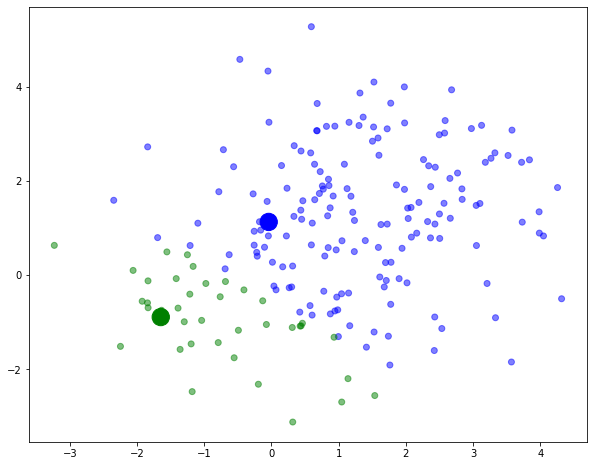

In [86]:
colors = {0:'blue', 1:'green'}
fig = plt.figure(figsize=(10, 8))
plt.scatter(noisy_X.iloc[:,0], noisy_X.iloc[:,1],  marker = 'o', c = noisy_X['centroid'].apply(lambda x: colors[x]), alpha = 0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  marker = 'o', s=300, 
           c = centroids.index.map(lambda x: colors[x]))

In [88]:
noisy_X['y'] = y

In [91]:
noisy_dataset = noisy_X.values

In [139]:
def purity(noisy_dataset):
	sum_error = 0.0
	for row in range(int(len(noisy_dataset[:,0]) / 2)):
			error = noisy_dataset[row, -1] - noisy_dataset[row, 2]
			sum_error += error**2
			class1_purity = (100 - (100 - sum_error)) / 100
	sum_error = 0.0
	for row in range(int(len(noisy_dataset[:,0]) / 2), len(noisy_dataset[:,0])):
			error = noisy_dataset[row, -1] - noisy_dataset[row, 2]
			sum_error += error**2
			class2_purity = (100 - (100 - sum_error)) / 100
	return class1_purity, class2_purity

In [140]:
purity1, purity2 = purity(noisy_dataset)
print(purity1)
print(purity2)

0.37
0.99


I think the clustering tendency is low because the data is not linearly separable.